## Compare Machine Learning Algorithms

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
dataset = pd.read_csv('dataset/diabetes.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [13]:
from sklearn.model_selection import KFold, cross_val_score
kfold = KFold(n_splits=10, random_state=0, shuffle=True)

### Compare Machine Learning Algorithm Consistently

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

names = []
results = []
scoring = 'accuracy'
for name, model in models:
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    names.append(name)
    results.append(cv_results)
    print(f'{name}: {cv_results.mean()}')


c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

LR: 0.7656015037593984
LDA: 0.7747265892002735
KNN: 0.6940191387559808
CART: 0.6992481203007519
NB: 0.748632946001367
SVM: 0.6511278195488721


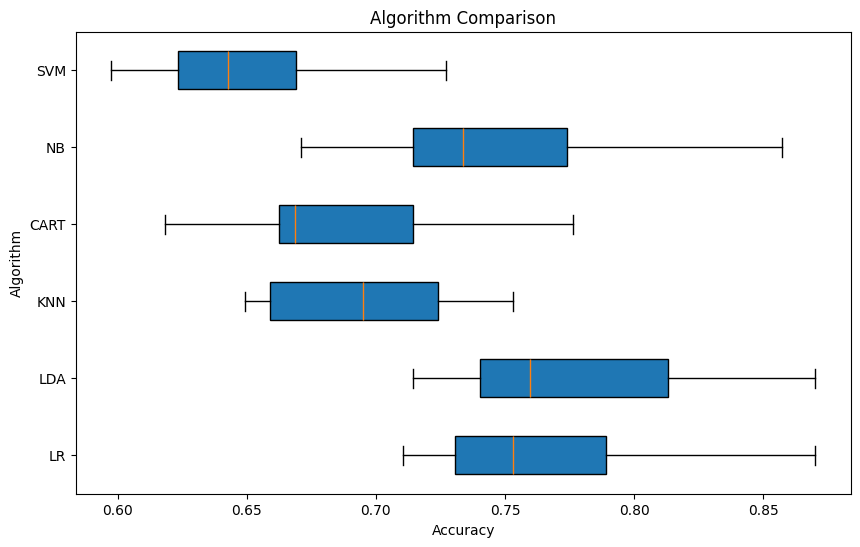

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.boxplot(results, vert=False, patch_artist=True)
ax.set_yticklabels(names)
ax.set_title('Algorithm Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
plt.show()